Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from keras import layers
from keras.layers import Dense, Dropout
from keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
# List all available datasets
print(tfds.list_builders())

# Load the 'tf_flowers' dataset
(train_data, val_data, test_data), metadata = tfds.load(
    'tf_flowers',
    split=('train[:80%]', 'train[80%:90%]', 'train[90%:]'),
    with_info=True,
    as_supervised=True,
)

print(type(train_data))


['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bridge_data_msr', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


Viewing Data

Shape: (333, 500, 3), Label: tulips
Shape: (212, 320, 3), Label: sunflowers
Shape: (240, 320, 3), Label: sunflowers


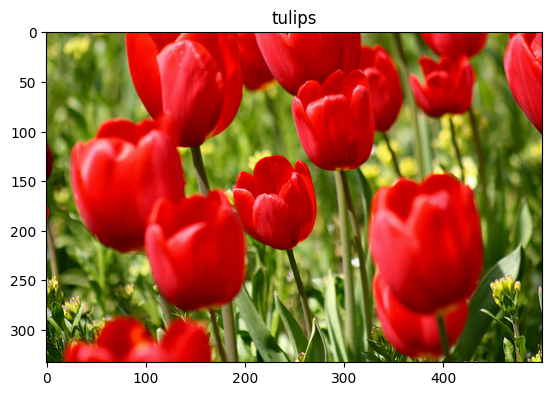

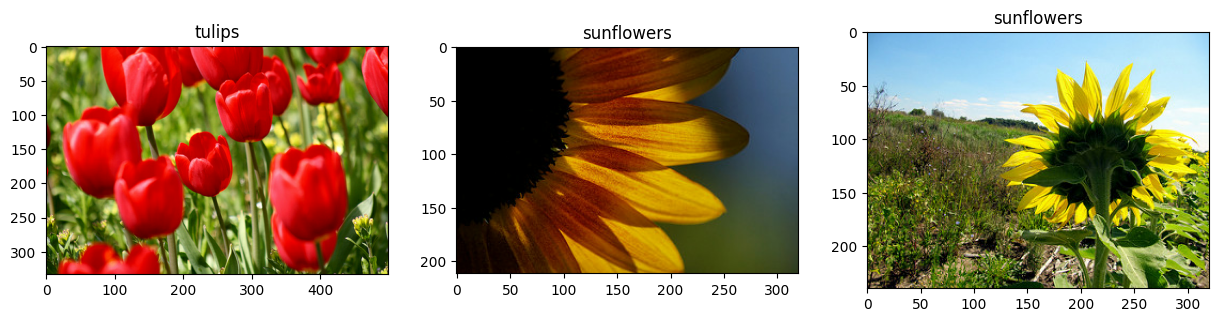

In [3]:
image, label = next(iter(train_data.take(1)))
plt.imshow(image)
label_name = metadata.features['label'].int2str(label)
plt.title(label_name)

# Display first 3 images with labels
images = []
labels = []
for img, lbl in train_data.take(3):
    label_name = metadata.features['label'].int2str(lbl)
    print(f"Shape: {img.shape}, Label: {label_name}")
    images.append(img)
    labels.append(label_name)

# Visualize images in a grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(labels[i])
plt.show()


Basic Preprocessing

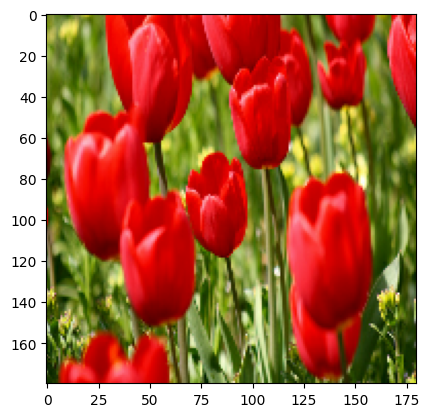

In [4]:
IMG_SIZE = 180

# Resize and normalize images
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1. / 255)
])

result = resize_rescale(images[0])
plt.imshow(result)


Data Augmentation

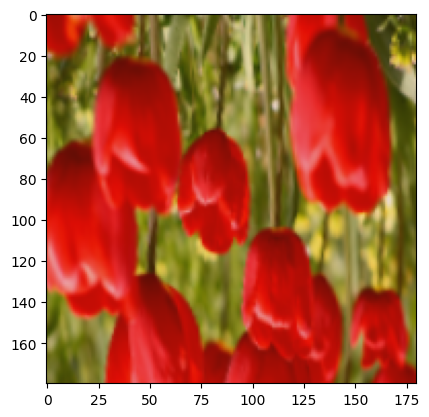

In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

# Apply preprocessing pipeline
processing = tf.keras.Sequential([
    resize_rescale,
    data_augmentation
])
augmented_image = processing(images[0])
plt.imshow(augmented_image)


 Building the Model

In [6]:
num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,565 (6.33 MB)

 Trainable params: 1,658,565 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

 Preprocessing Data

In [7]:
def preprocess(image, label):
    image = resize_rescale(image)
    image = data_augmentation(image)
    return image, label

train_data = train_data.map(preprocess).cache().batch(32).prefetch(tf.data.AUTOTUNE)
val_data = val_data.map(preprocess).cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).cache().batch(32).prefetch(tf.data.AUTOTUNE)

Training the Model

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3
)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.3719 - loss: 1.4407 - val_accuracy: 0.5422 - val_loss: 1.1320
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.5844 - loss: 1.0624 - val_accuracy: 0.6349 - val_loss: 0.9801
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6511 - loss: 0.9236 - val_accuracy: 0.5858 - val_loss: 1.0362


Evaluating the Model

In [9]:
accuracy, loss = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy}, Test Loss: {loss}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 780ms/step - accuracy: 0.6002 - loss: 0.9919
Test Accuracy: 0.9886924624443054, Test Loss: 0.6021798253059387
